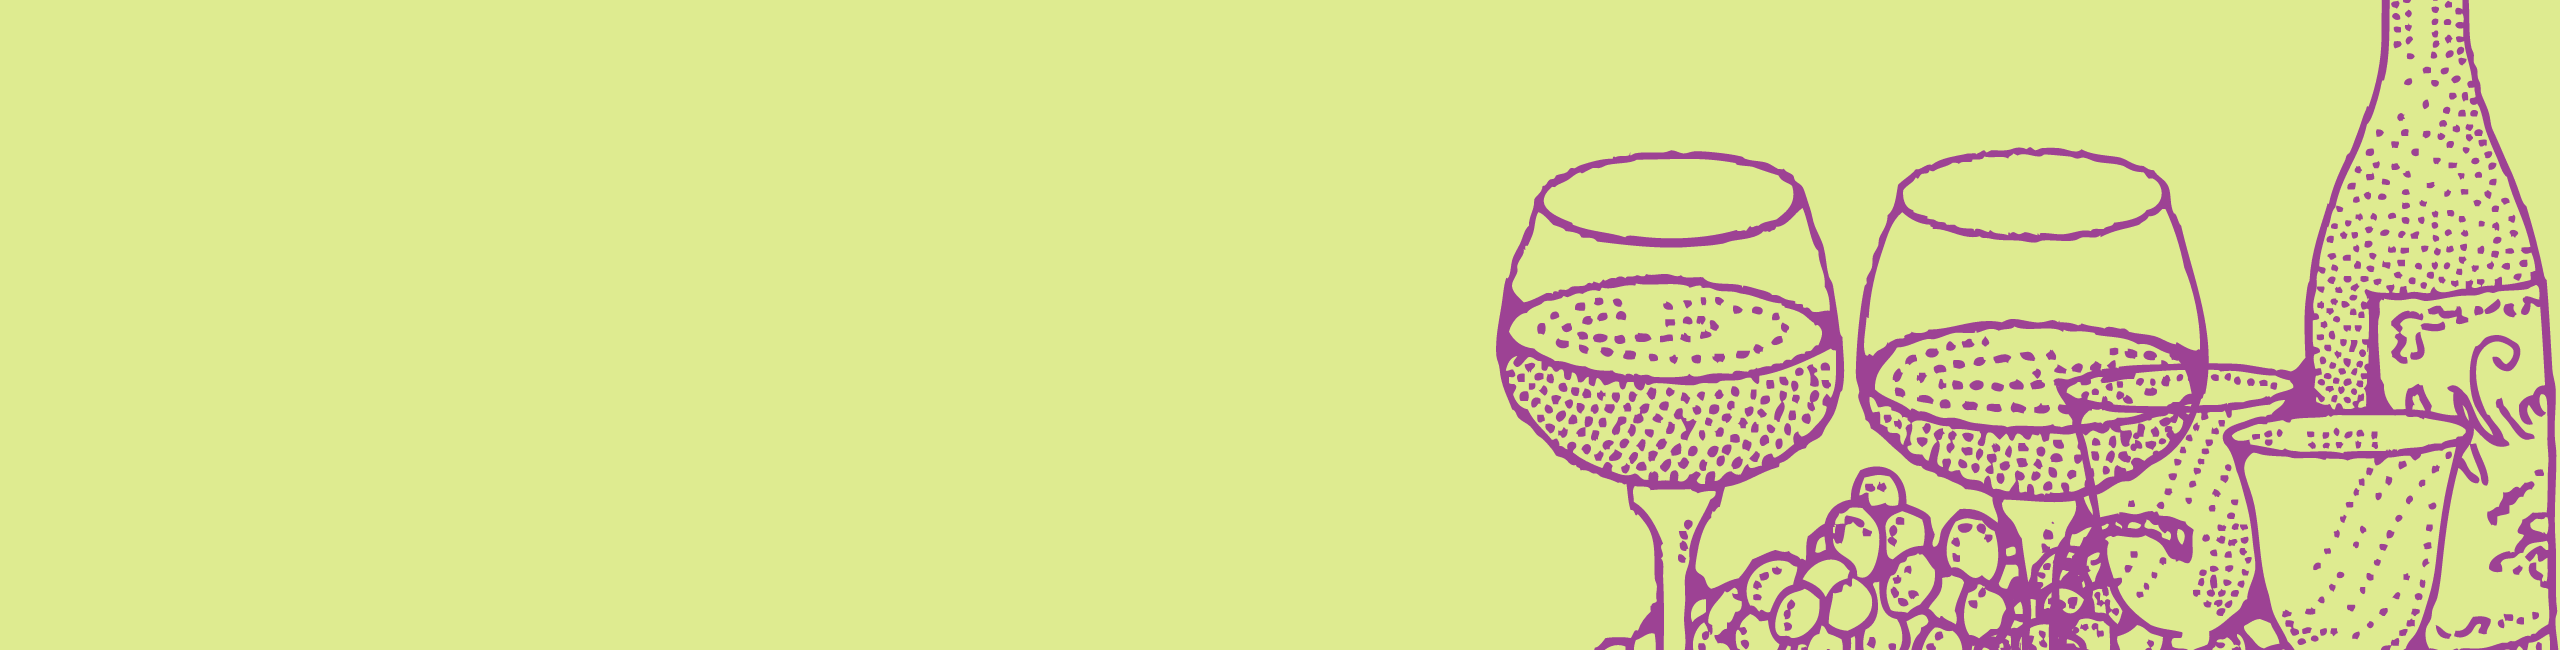

In [1]:
from IPython.display import Image
Image(filename='wine_banner.png')

# Predictive Judgments: Python vs Daniel Kahneman

## 1. Import libraries & load in data.

> Download wine dataset from https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009 

In [2]:
import pandas as pd #pip install pandas
import matplotlib.pyplot as plt # pip install matplotlib
import seaborn as sns # pip install seaborn
from sklearn.linear_model import LinearRegression #pip install -U scikit-learn
from sklearn.model_selection import train_test_split 

In [3]:
df = pd.read_csv("winequality-red.csv")

- A cursory look at the dataframe reveals a variety of factors which presumably influence the perceived quality of the wine. 

The quality of the wine is a score between 0 and 10. 

In [4]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## 2. Check dataset quality. 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

## 3. Formulate your research question. 

__Q1: What makes for a good wine?__

__Q2: How are the wine ratings distributed?__

- Another cursory look reveals that the vast majority of wines - about 93% -  are rated either 5, 6, or 7 out of 10. 

In [7]:
df.quality.value_counts(normalize=True)

5    0.425891
6    0.398999
7    0.124453
4    0.033146
8    0.011257
3    0.006254
Name: quality, dtype: float64

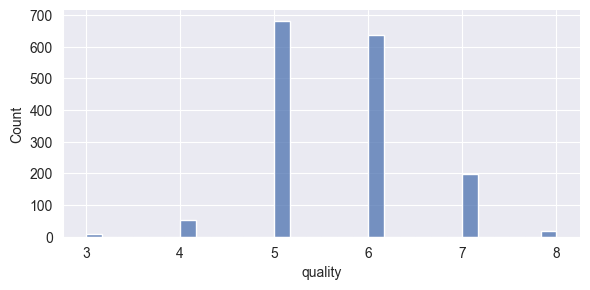

<Figure size 640x480 with 0 Axes>

In [18]:
# using a quick visualisation of the quality distribution
sns.displot(x=df.quality, height=3, aspect=2)
sns.set_style('darkgrid')
sns.set_palette('deep') 
plt.show()
plt.clf()

## 4. EDA
There are filter, wrapper and embedded methods available for feature selection. As these are above
my current skill level, I have instead elected to normalise each feature and explore it individually.

> Min-Max Normalisation 
<br>
<br>
`For every feature in a dataset, its minimum value becomes 0 and its maximum value becomes 1.`
<br>
`Every other feature value is transformed into a value between 0 and 1.`

In [9]:
df_new = (df-df.min())/(df.max()-df.min())

EDA appears to indicate that higher wine quality is positively correlated with medium or higher levels of 
- fixed acidity 
- citric acid
- free sulfur dioxide 
- density
- pH
- alcohol 

Conversely, it appears to indicate that lower rated wines have higher levels of:
- volatile acidity
- residual sugar
- chlorides
- total sulfur dioxides
- sulphates 

> Wine drinkers appear to dislike sweet wines that taste of chemicals. 
<br>
> Generally speaking, they seem to enjoy wines that are not sour - more on the basic side - with a bit of a kick 
<br>
> from the acidity and alcohol. 
<br>
Good wine should be not sweet and not watery, ie have a nice mouthfeel.  

In [10]:
features = df.columns[:-1]
print(features)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')


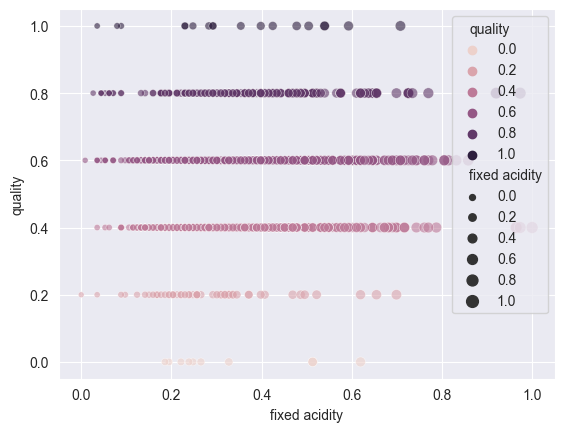

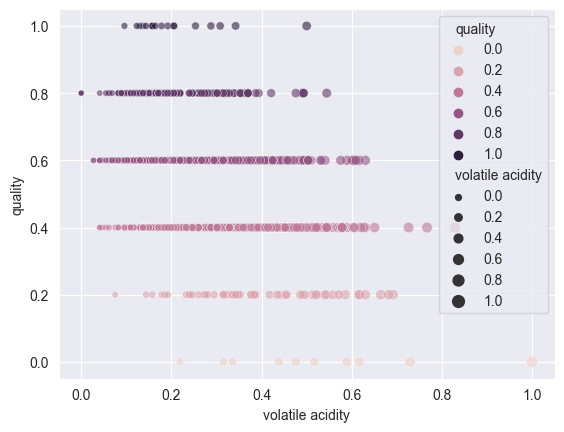

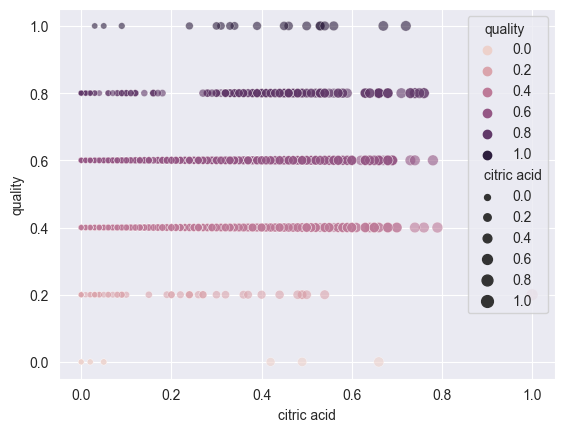

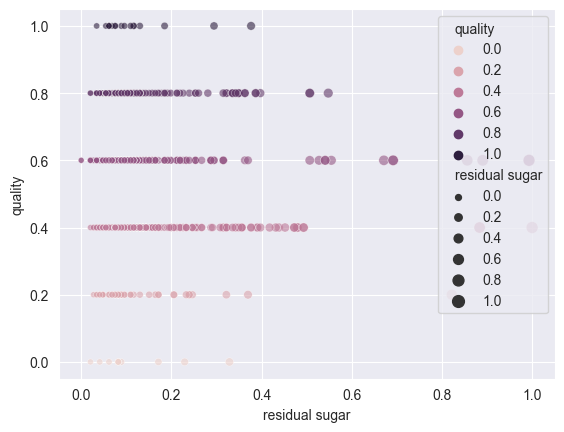

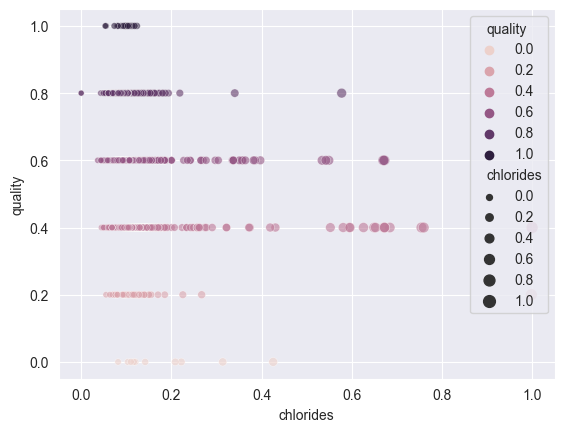

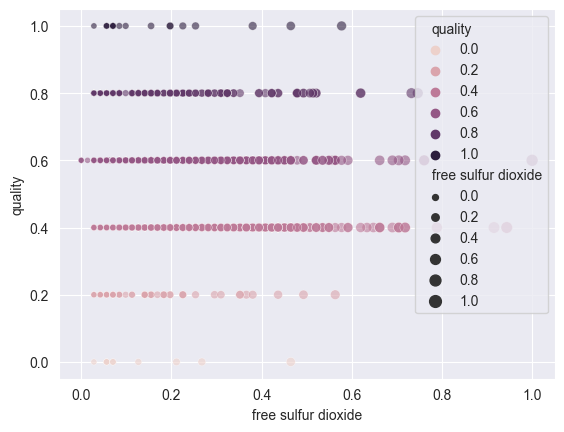

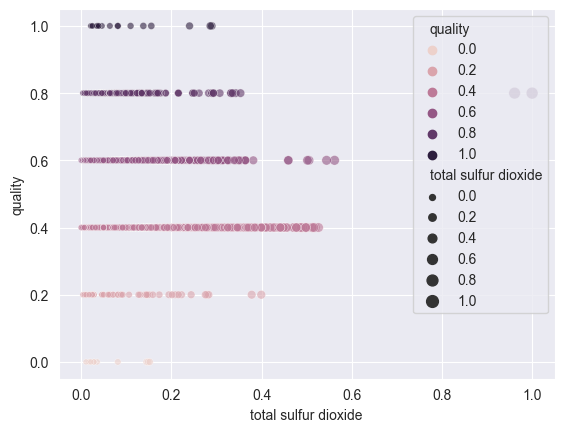

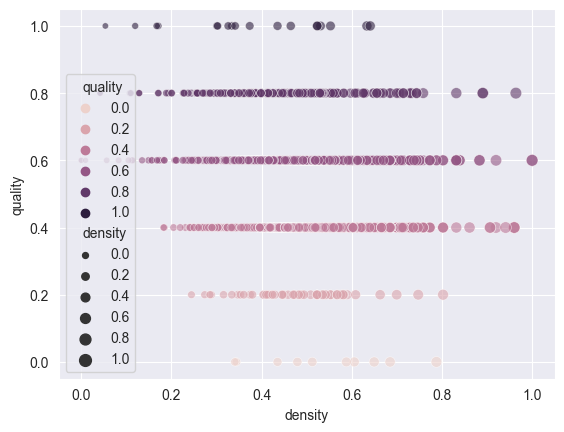

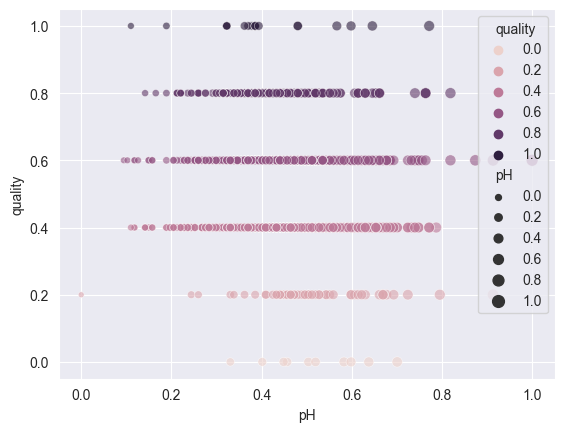

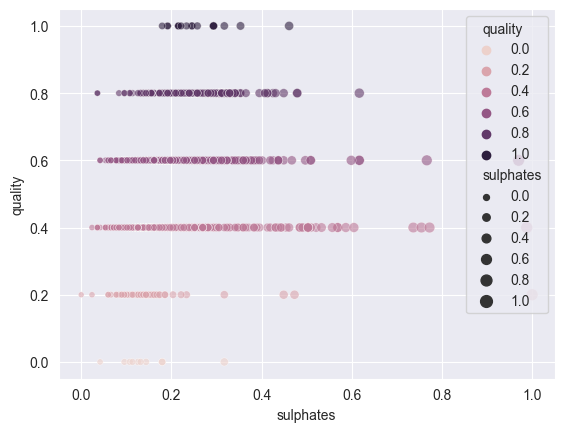

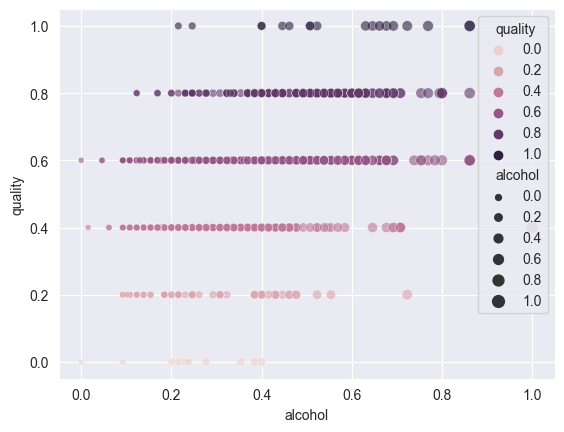

<Figure size 640x480 with 0 Axes>

In [11]:
# since quality is the last feature, there is no need to plot it - hence only plotting until the second last feature

for feature in features:
    sns.set_style('darkgrid')
    sns.scatterplot(x=df_new[feature], y='quality', data=df_new, hue='quality', size=df_new[feature], alpha=.6)
    plt.show()
    plt.clf()

## 5. Build simple multiple regression model

In [12]:
# x refers to all the features - the variables - that influence the quality rating
# y refers to the feature that you want to predict
x = df_new[features]
y = df_new.quality

In [13]:
# create model object and split into training and testing sets
mlr = LinearRegression()
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2, random_state=42)

In [14]:
# fit the model to the training data set
mlr.fit(x_train, y_train)

LinearRegression()

In [15]:
# check performance of the model using the model's score method and the test dataset (residual analysis)
# 0.4 means that all the variables combined account for 40% of the variance in quality
# usually, 0.7 ot 70% is considered good
mlr.score(x_test, y_test)

0.40318034127962177

In [16]:
# coefficients help determine which variables carry the most weight
mlr.coef_

array([ 0.05217285, -0.29238089, -0.02816429,  0.01916779, -0.21641908,
        0.07990815, -0.20627581, -0.02819774, -0.09999668,  0.28095132,
        0.36645644])

In [19]:
print(features)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')


In [17]:
# trying to predict a great wine - high sulphate & high alcohol content
# would this be a tasty wine though...?
my_wine = [[.7, .5, .7, .3, .2, .6, .2, .8, .7, .9, .9]]
predict_my_wine = mlr.predict(my_wine)
print(predict_my_wine)

[0.85529971]


c:\Users\laura\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


## 6. Conclusions
First off, the model is not reliable and therefore its predictive powers should be taken with a
lump of salt.
<br>
It is possible that there are factors other than the features listed in the dataset that influence
quality.  
<br>
Another possibility is that the model needs improving. :)

### Thank you for your attention!